In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.model_selection import train_test_split
from scipy import sparse

import surprise
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import os

In [2]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
from numba import jit # Compile some functions when performance is critical
import keras
from keras.initializers import RandomNormal
from keras.models import Model, load_model, save_model
from keras.layers import Embedding, Input, Dense, Concatenate, Multiply, Flatten
from keras.optimizers import Adam
import tensorflow as tf

from keras.layers.merge import dot
from keras.models import Model

Using TensorFlow backend.


In [3]:
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau
from keras.layers.merge import dot
from keras.models import Model

In [4]:
data1= pd.read_csv('Dataset/UserInteractionV1.csv')

In [5]:
new = data1[['user_id','book_id','rating']]

In [6]:
new = new.loc[:, ~new.columns.str.contains('^Unnamed')]

In [7]:
users = new.user_id.unique()
Books = new.book_id.unique()

userid2idx = {o:i for i,o in enumerate(users)}
Bookid2idx = {o:i for i,o in enumerate(Books)}

In [8]:
n_latent_factors=50

In [9]:
new['user_id'] = new['user_id'].apply(lambda x: userid2idx[x])
new['book_id'] = new['book_id'].apply(lambda x: Bookid2idx[x])
split = np.random.rand(len(new)) < 0.8
train = new[split]
valid = new[~split]
print(train.shape , valid.shape)

(892231, 3) (222568, 3)


In [10]:
train.head(10)

,user_id,book_id,rating
0,0,0,5
2,2,0,5
3,3,0,5
4,4,0,5
7,7,0,4
9,9,0,5
12,12,0,4
13,13,0,3
14,14,0,3
15,15,0,5


In [11]:
def create_embed(n_latent_factors, n_book, n_users):
    user_input=Input(shape=(1,),name='user_input',dtype='int64')
    user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
    
    user_vec=Flatten(name='FlattenUsers')(user_embedding)
    user_vec=Dropout(0.40)(user_vec)
    
    book_input=Input(shape=(1,),name='book_input',dtype='int64')
    book_embedding=Embedding(n_book,n_latent_factors,name='book_embedding')(book_input)
   
    book_vec=Flatten(name='Flattenbooks')(book_embedding)
    book_vec=Dropout(0.40)(book_vec)
    
    sim=dot([user_vec,book_vec],name='SimalarityDotProduct',axes=1)
    
    return user_vec, book_vec, user_input, book_input, sim 

In [12]:
n_book=len(new['book_id'].unique())
n_users=len(new['user_id'].unique())

In [13]:
def root_mean_squared_error(y_train, y_val):
        return K.sqrt(K.mean(K.square(y_val - y_train))) 

In [16]:
user_vec, book_vec, user_input, book_input, sim = create_embed(50, n_book, n_users)
model_v0 = Model(inputs=[user_input, book_input], outputs= sim)
opt = Adam(lr=0.001)
model_v0.compile(optimizer=opt,loss =root_mean_squared_error)
history_v0 = model_v0.fit([train.user_id,train.book_id],train.rating, batch_size= 128, epochs =10, 
                          validation_data = ([valid.user_id,valid.book_id],valid.rating),
                              verbose = 1)


Train on 892231 samples, validate on 222568 samples
Epoch 1/10
892231/892231 [==============================] - 64s 72us/step - loss: 3.5303 - val_loss: 2.4206
Epoch 2/10
892231/892231 [==============================] - 64s 71us/step - loss: 1.9359 - val_loss: 1.4477
Epoch 3/10
892231/892231 [==============================] - 69s 78us/step - loss: 1.4947 - val_loss: 1.2340
Epoch 4/10
892231/892231 [==============================] - 71s 80us/step - loss: 1.3925 - val_loss: 1.1688
Epoch 5/10
892231/892231 [==============================] - 74s 83us/step - loss: 1.3614 - val_loss: 1.1431
Epoch 6/10
892231/892231 [==============================] - 67s 75us/step - loss: 1.3489 - val_loss: 1.1314
Epoch 7/10
892231/892231 [==============================] - 80s 90us/step - loss: 1.3434 - val_loss: 1.1264
Epoch 8/10
892231/892231 [==============================] - 76s 85us/step - loss: 1.3392 - val_loss: 1.1227
Epoch 9/10
892231/892231 [==============================] - 80s 89us/step - loss: 1.

In [17]:
history_v0 = model_v0.fit([train.user_id,train.book_id],train.rating, batch_size= 128, epochs =10, 
                          validation_data = ([valid.user_id,valid.book_id],valid.rating),
                              verbose = 1)



Train on 892231 samples, validate on 222568 samples
Epoch 1/10
892231/892231 [==============================] - 72s 81us/step - loss: 1.3346 - val_loss: 1.1177
Epoch 2/10
892231/892231 [==============================] - 78s 87us/step - loss: 1.3342 - val_loss: 1.1182
Epoch 3/10
892231/892231 [==============================] - 78s 88us/step - loss: 1.3337 - val_loss: 1.1172
Epoch 4/10
892231/892231 [==============================] - 80s 90us/step - loss: 1.3333 - val_loss: 1.1163
Epoch 5/10
892231/892231 [==============================] - 80s 90us/step - loss: 1.3320 - val_loss: 1.1155
Epoch 6/10
892231/892231 [==============================] - 76s 85us/step - loss: 1.3306 - val_loss: 1.1166
Epoch 7/10
892231/892231 [==============================] - 78s 88us/step - loss: 1.3286 - val_loss: 1.1151
Epoch 8/10
892231/892231 [==============================] - 73s 82us/step - loss: 1.3289 - val_loss: 1.1155
Epoch 9/10
892231/892231 [==============================] - 83s 93us/step - loss: 1.

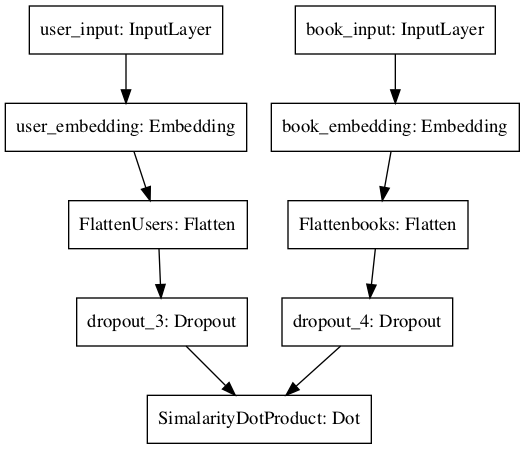

In [18]:
from keras.utils import plot_model
plot_model(model_v0, to_file='model_v2.png')